### Install and Import Dependencies

In [41]:
%pip install pandas
%pip install scipy
%pip install matplotlib # might not need
%pip install seaborn
%pip install scikit-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [2]:
# for loading/processing data
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
# For Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# For evaluating Classifier
from sklearn import metrics


### Load Dataset

In [3]:
# Load in the arff file
arff_file = arff.loadarff('data/seismic-bumps.arff')
# Convert to a pandas dataframe
data = pd.DataFrame(arff_file[0])

# Get shape of dataframe: (rows, columns)
print(data.shape)

# Visualize the dataframe
data.sample(5)

(2584, 19)


,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
497,b'a',b'b',b'N',2190.0,29.0,-69.0,-42.0,b'a',1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,200.0,b'0'
635,b'b',b'a',b'W',51660.0,626.0,19.0,29.0,b'a',1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,500.0,b'0'
1312,b'a',b'b',b'W',18170.0,408.0,50.0,35.0,b'b',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
2389,b'a',b'b',b'W',32050.0,645.0,7.0,56.0,b'a',1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,300.0,b'0'
140,b'a',b'a',b'W',316200.0,1089.0,-37.0,-21.0,b'a',3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2700.0,1000.0,b'0'


### Explore Dataset

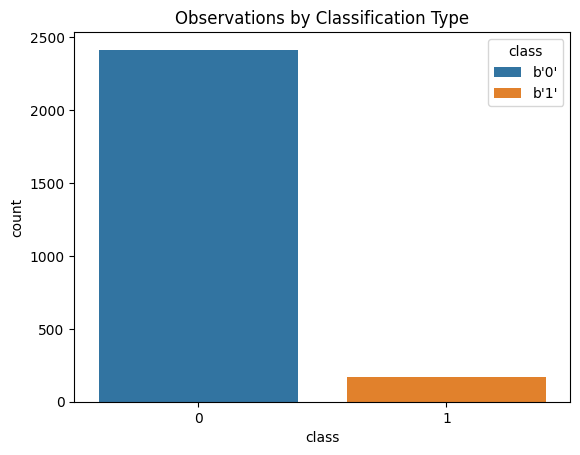

In [4]:
# TODO: add documentation links

# Create a bar chart to plot counts of each class
ax = sns.countplot(x = data['class'], hue=data['class'])

# add plot title|
plt.title("Observations by Classification Type")

# show plot
plt.show()

### Process/Split Dataset

In [5]:
# TODO: maybe replace labels to something more understandable?

# Ignoring the categorical data for now
# split X and Y
# Only want the numerical columns
input_cols = [i for i in range(data.shape[1]) if (i > 2) and (i != 7) and (i != data.shape[1] - 1)]
# Shape: (2584, 14)
X = data.iloc[:,input_cols]
# Shape: (2584, 1)
Y = data.iloc[:,-1].astype(np.float32)
# VIsualize the data
display(X.head(5))
display(Y.head(5))

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
0,15180.0,48.0,-72.0,-72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14720.0,33.0,-70.0,-79.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0
2,8050.0,30.0,-81.0,-78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28820.0,171.0,-23.0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0
4,12640.0,57.0,-63.0,-52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float32

In [6]:
# Split the data into the train and test set
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Random Forest Scikit-learn

### Baseline Model

In [7]:
# Make the classifier
classifier = RandomForestClassifier(max_depth=3, random_state=0)

# Train the classifier
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, random_state=0)

### Evaluation with Performance Metrics

In [26]:
# Running the test set through the model
baseline_output = classifier.predict_proba(X_test)
# Peak into a few predicted output probabilities: (probability of class 0, probability of class 1)
baseline_output[:10]

array([[0.96872168, 0.03127832],
       [0.96589975, 0.03410025],
       [0.96719163, 0.03280837],
       [0.78433224, 0.21566776],
       [0.97581395, 0.02418605],
       [0.94945199, 0.05054801],
       [0.87306223, 0.12693777],
       [0.8940923 , 0.1059077 ],
       [0.91827844, 0.08172156],
       [0.73785344, 0.26214656]])

In [41]:
# Getting the ROC curve and plotting
fpr, tpr, thresholds = metrics.roc_curve(Y_test, baseline_output[:, 0], pos_label=0)

In [44]:
# Putting into dataframe
baseline_output_dict = {
    "fpr": fpr,
    "tpr": tpr
}
baseline_output_roc = pd.DataFrame(baseline_output_dict)
baseline_output_roc.head(5)

,fpr,tpr
0,0.00000,0.000000
1,0.02439,0.053061
2,0.02439,0.063946
3,0.02439,0.078912
4,0.02439,0.081633


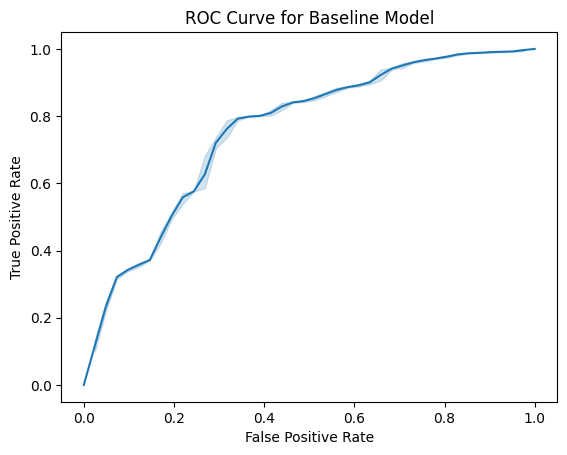

In [45]:
ax = sns.lineplot(data=baseline_output_roc, x="fpr", y="tpr")
plt.title("ROC Curve for Baseline Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [29]:
# PR Curve
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, baseline_output[:,0])

In [46]:
# Creating Dataframe
baseline_output_dict_pr = {
    "precision": precision,
    "recall": recall
}
baseline_output_pr = pd.DataFrame(baseline_output_dict_pr)
baseline_output_pr.head(5)

,precision,recall
0,0.052835,1.00000
1,0.051613,0.97561
2,0.051680,0.97561
3,0.051746,0.97561
4,0.051813,0.97561


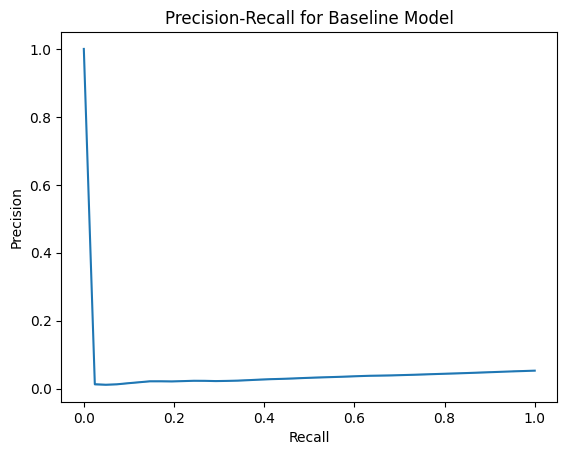

In [47]:
# Plotting
ax = sns.lineplot(data=baseline_output_pr, x="recall", y="precision")
plt.title("Precision-Recall for Baseline Model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Upsampling Techniques

### Random Upsampling

### SMOTE

### OPTIONAL: Borderline SMOTE